In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Customers.csv')

In [3]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [4]:
df.info()

# the column Profession has 1965 not null values out of 2000 which say it must have 36 Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [5]:
df.shape

(2000, 8)

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [7]:
df.tail()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


In [8]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [9]:
df['Profession'].isnull().sum()

35

# Filling Null Value

Using 'FFILL' (forward fill method)

In [10]:
df['Profession'].fillna(method='ffill',inplace=True)

In [11]:
df['Profession'].isnull().sum()

0

# Normalisation using Min-Max Scaler

In [12]:
# Using the normalizer function on a column with int or float values only
# We cannot use Normalization on column with str values

test = df['Annual Income ($)']
test

0        15000
1        35000
2        86000
3        59000
4        38000
         ...  
1995    184387
1996     73158
1997     90961
1998    182109
1999    110610
Name: Annual Income ($), Length: 2000, dtype: int64

(array([ 52.,  50., 127., 289., 296., 239., 237., 253., 222., 235.]),
 array([     0. ,  18997.4,  37994.8,  56992.2,  75989.6,  94987. ,
        113984.4, 132981.8, 151979.2, 170976.6, 189974. ]),
 <BarContainer object of 10 artists>)

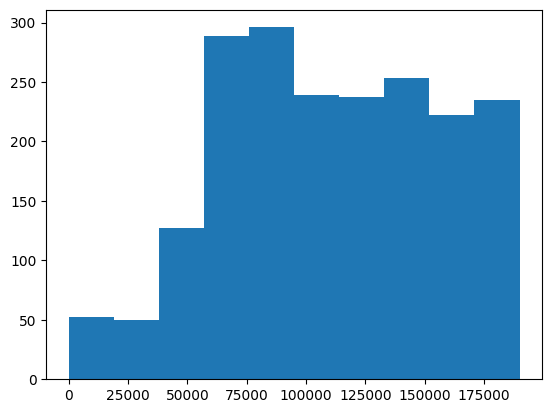

In [13]:
#Visualising the distribution of data

plt.hist(test)

In [14]:
plt.show()

*Before using normalisation the variation between 0 to 175000 on x-axis is too much to interpret*

In [16]:
#using mean scaler

normalised = (test-test.mean())/test.std()
print(normalised)

0      -2.092978
1      -1.655719
2      -0.540710
3      -1.131009
4      -1.590130
          ...   
1995    1.610318
1996   -0.821474
1997   -0.432248
1998    1.560514
1999   -0.002663
Name: Annual Income ($), Length: 2000, dtype: float64


(array([ 52.,  50., 127., 289., 296., 239., 237., 253., 222., 235.]),
 array([-2.42092136, -2.00558266, -1.59024395, -1.17490524, -0.75956654,
        -0.34422783,  0.07111088,  0.48644958,  0.90178829,  1.31712699,
         1.7324657 ]),
 <BarContainer object of 10 artists>)

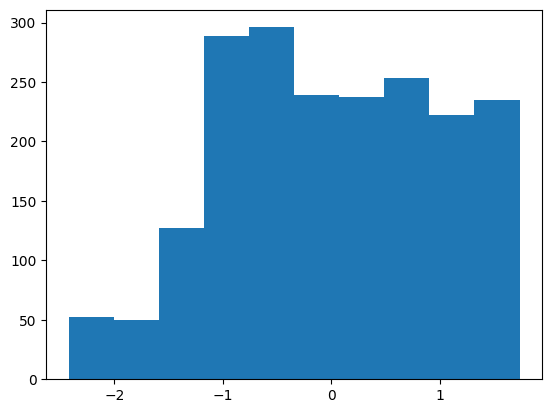

In [17]:
#visualising data after normalisation

plt.hist(normalised)

**After using normalised the same data lies between -2 to 1 which is easy to interpret**

In [18]:
#updating the old dataset with normalised dataset

df.update(normalised)

**Z-Score**

In [20]:
#It is useful for obtaining probability distribution
# All the statistic function are located in this module like probability distribution, frequecy statistic, corelation function etc

import scipy.stats as stats

In [21]:
#Z-score value is to understand how far the data point is from the mean. 
#Technically it measure the standard deviation below and above the mean

# Using the Z-score on the same column ('Annual Income ($)')
# Here the result of Z-score is same as the Mean Scaler

stats.zscore(test)

0      -2.093501
1      -1.656133
2      -0.540845
3      -1.131292
4      -1.590528
          ...   
1995    1.610720
1996   -0.821679
1997   -0.432356
1998    1.560904
1999   -0.002664
Name: Annual Income ($), Length: 2000, dtype: float64

# **Turning Categorical function into Numeric type**

In [23]:
#Here replacing male with '0' and female with '1' for dataset using straight forward method of replacing

df['Gender'].replace(['Male','Female'],[0,1], inplace=True)

In [24]:
# Displaying the altered dataset
# Here the Gender is changed as Male:0 Female:1 and the column 'Annual Income ($)' has been Normalized

df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,0,19,-2.092978,39,Healthcare,1,4
1,2,0,21,-1.655719,81,Engineer,3,3
2,3,1,20,-0.540710,6,Engineer,1,1
3,4,1,23,-1.131009,77,Lawyer,0,2
4,5,1,31,-1.590130,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,1,71,1.610318,40,Artist,8,7
1996,1997,1,91,-0.821474,32,Doctor,7,7
1997,1998,0,87,-0.432248,14,Healthcare,9,2
1998,1999,0,77,1.560514,4,Executive,7,2
